### Shenghuijun Fan

### Assignment #1


#### 1. Use a simple bag-of-words approach


In [1]:
import numpy as np
import pandas as pd

In [3]:
#use pandas to read data and extract content in review text
data=pd.read_csv('fashion data.csv')
data=data["review text"]
data.to_csv("review text.csv", header=False)

In [4]:
#read data that contains review text only
review=open('review text.csv', 'r')
review=review.read()

In [5]:
#replace new line with space. 
review=review.replace('\n', ' ')

In [7]:
import nltk
from nltk import FreqDist

In [8]:
review_token=nltk.word_tokenize(review)


In [9]:
#eliminate numbers and keep word character only and change to lower case
review_word=[w.lower() for w in review_token if w.isalpha()]


In [49]:
len(review_word)

119050

In [11]:
review_freq=FreqDist(review_word)

In [12]:
#sort frequency in descending order
review_sorted=sorted(review_freq.items(), key=lambda k:k[1], reverse=True)



In [105]:
#create a dataframe from sorted frequency for better visualization
df=pd.DataFrame(review_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,the,6451
1,a,4197
2,and,3708
3,of,3610
4,to,2531
5,in,2357
6,with,1584
7,that,1562
8,was,1410
9,for,1109


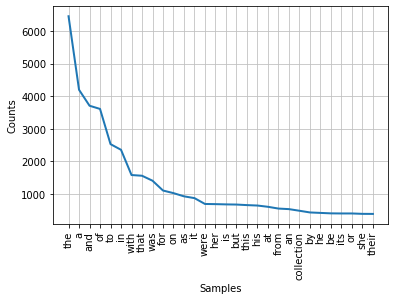

In [56]:
#plot top 30 high frequency words
review_freq.plot(30)

#### 2. Use a bag-of-words approach with stemming and stop words removal


In [14]:
from nltk.corpus import stopwords
stopwords=stopwords.words('english')

In [15]:
#eliminate stop words
review_nostop=[w for w in review_word if w not in stopwords]


In [60]:
len(review_nostop)

67867

In [16]:
nostop_freq=FreqDist(review_nostop)


In [17]:
nostop_sorted=sorted(nostop_freq.items(), key=lambda k:k[1], reverse=True)


In [104]:
df=pd.DataFrame(nostop_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,collection,489
1,new,357
2,one,354
3,dresses,328
4,like,313
5,show,295
6,dress,283
7,spring,241
8,designer,232
9,clothes,226


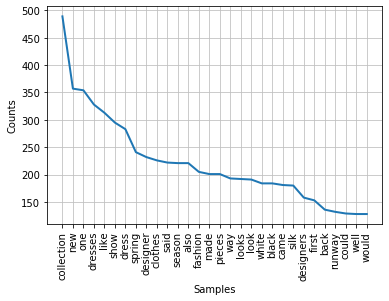

In [66]:
nostop_freq.plot(30)

In [18]:
#use Porter Stemmer
ps=nltk.PorterStemmer()
review_stem=[ps.stem(w) for w in review_nostop]


In [19]:
stem_freq=FreqDist(review_stem)
stem_sorted=sorted(stem_freq.items(), key=lambda k:k[1], reverse=True)


In [106]:
df=pd.DataFrame(stem_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,dress,660
1,collect,601
2,design,499
3,look,492
4,show,431
5,one,393
6,new,364
7,like,360
8,season,293
9,print,278


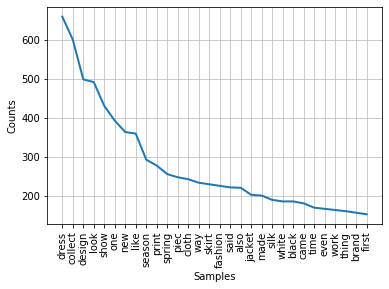

In [72]:
stem_freq.plot(30)

In [20]:
#use Lancaster Stemmer
ls=nltk.LancasterStemmer()
review_ls=[ls.stem(w) for w in review_nostop]
ls_freq=FreqDist(review_ls)
ls_sorted=sorted(ls_freq.items(), key=lambda k:k[1], reverse=True)


In [107]:
df=pd.DataFrame(ls_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,dress,662
1,collect,603
2,design,499
3,look,493
4,show,432
5,on,394
6,new,384
7,lik,361
8,season,295
9,print,282


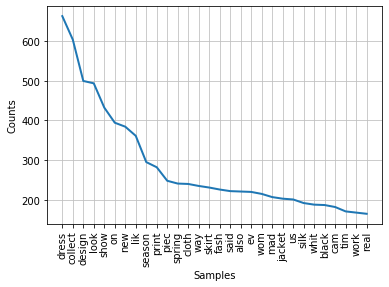

In [76]:
ls_freq.plot(30)

#### 3. Use POS approach and focus on all the noun forms (NN, NNP, NNS, NNPS)

In [21]:
# generate POS tags
review_POS=nltk.pos_tag(review_token)


In [22]:
# keep words that has POS tag starts with N
POS_N=[(w,t) for (w,t) in review_POS if t.startswith('N')]


In [23]:
POS_N_freq=FreqDist(POS_N)
POS_N_sorted=sorted(POS_N_freq.items(), key=lambda k:k[1], reverse=True)


In [108]:
df=pd.DataFrame(POS_N_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,"(collection, NN)",480
1,"(dresses, NNS)",302
2,"(dress, NN)",270
3,"(show, NN)",250
4,"(designer, NN)",228
5,"(clothes, NNS)",223
6,"(season, NN)",219
7,"(pieces, NNS)",196
8,"(way, NN)",191
9,"(silk, NN)",168


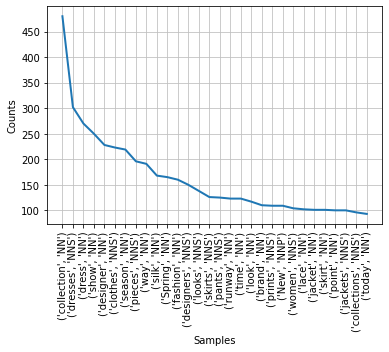

In [83]:
POS_N_freq.plot(30)

#### 4. Use POS approach and only focus on NNP

In [24]:
#keep words that has POS tag exactly as NNP
POS_NNP=[(w,t) for (w,t) in review_POS if t=="NNP"]


In [25]:
POS_NNP_freq=FreqDist(POS_NNP)
POS_NNP_sorted=sorted(POS_NNP_freq.items(), key=lambda k:k[1], reverse=True)


In [109]:
df=pd.DataFrame(POS_NNP_sorted, columns=['words', 'tag'])
df.head(30)

,words,tag
0,"(New, NNP)",109
1,"(York, NNP)",88
2,"(Spring, NNP)",44
3,"(London, NNP)",43
4,"(Fashion, NNP)",38
5,"(Paris, NNP)",37
6,"(West, NNP)",25
7,"(City, NNP)",22
8,"(A, NNP)",21
9,"(Wang, NNP)",20


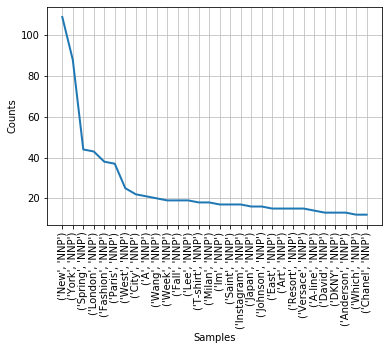

In [88]:
POS_NNP_freq.plot(30)